## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
data = pd.read_csv('insurance.csv')

## Getting some informations about the dataset

In [3]:
data.shape

(1338, 7)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Getting some statistical measures about the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## The number of missing values in each column

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## The number of unique values in each column

In [8]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## The unique values in each categorical column

In [9]:
for column in data.columns:
  if data[column].dtype == 'object' or column == 'children':
    print(f"{column}: {data[column].unique()}")

sex: ['female' 'male']
children: [0 1 3 2 5 4]
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


## Visualizing columns

### The age column

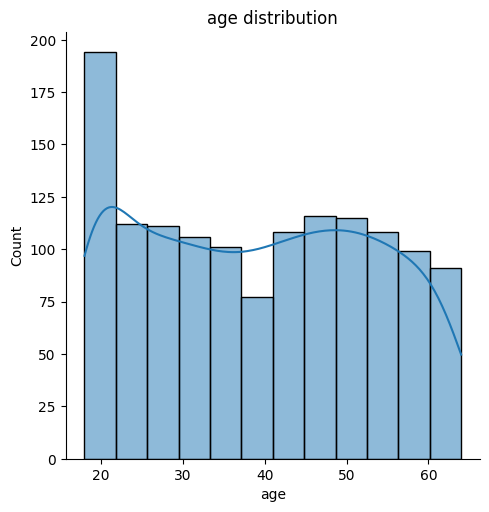

In [10]:
sns.displot(data, x='age', kde=True)
plt.title('age distribution')
plt.show()

### The sex column

In [11]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

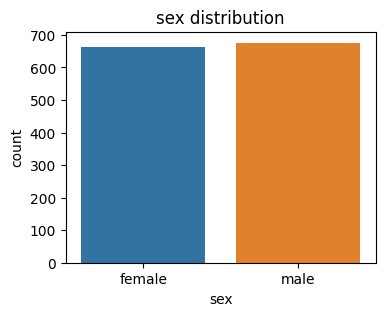

In [12]:
plt.figure(figsize=(4,3))
sns.countplot(data, x='sex')
plt.title('sex distribution')
plt.show()

### The bmi column

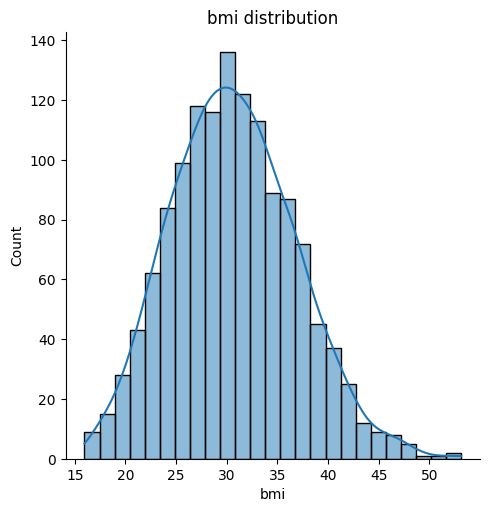

In [13]:
sns.displot(data, x='bmi', kde=True)
plt.title('bmi distribution')
plt.show()

### The children column

In [14]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

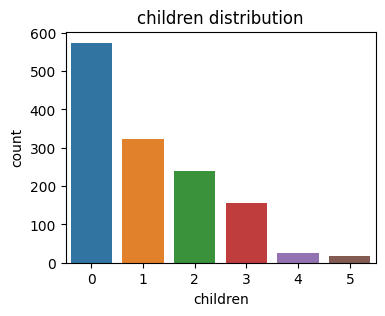

In [15]:
plt.figure(figsize=(4,3))
sns.countplot(data, x='children')
plt.title('children distribution')
plt.show()

### The smoker column

In [16]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

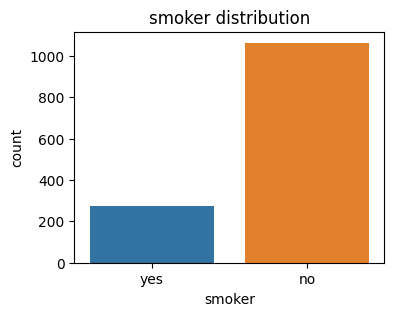

In [17]:
plt.figure(figsize=(4,3))
sns.countplot(data, x='smoker')
plt.title('smoker distribution')
plt.show()

### The region column

In [18]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

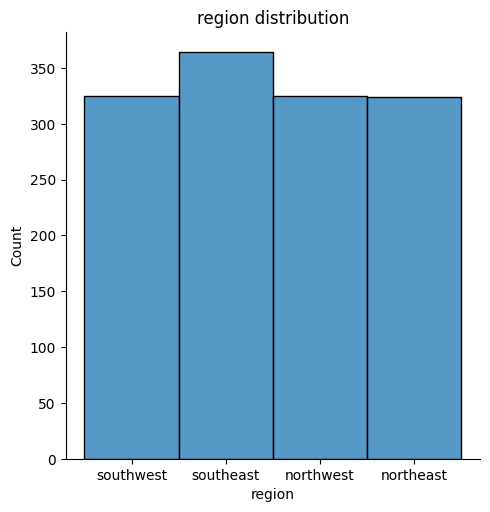

In [19]:
sns.displot(data, x='region')
plt.title('region distribution')
plt.show()

### The charges column

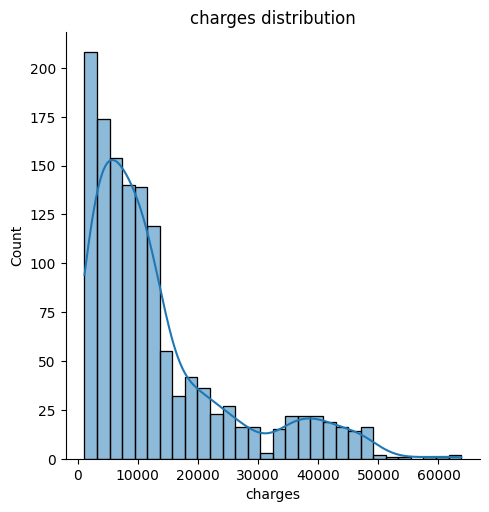

In [20]:
sns.displot(data, x='charges', kde=True)
plt.title('charges distribution')
plt.show()

## Getting the indpendent variables and the dependent variable

In [21]:
X = data.drop(columns='charges').values
y = data['charges'].values

In [22]:
print(X.shape)
print(y.shape)

(1338, 6)
(1338,)


## Encoding categorical column

In [23]:
# Applying label encoding to the 'sex' and 'smoker' columns
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
X[:,1] = le_sex.fit_transform(X[:,1])
X[:,-2] = le_smoker.fit_transform(X[:,-2])

In [24]:
# Applying the one hot encoding to the 'region' column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = ct.fit_transform(X)

In [25]:
print(X)

[[0.0 0.0 0.0 ... 27.9 0 1]
 [0.0 0.0 1.0 ... 33.77 1 0]
 [0.0 0.0 1.0 ... 33.0 3 0]
 ...
 [0.0 0.0 1.0 ... 36.85 0 0]
 [0.0 0.0 0.0 ... 25.8 0 0]
 [0.0 1.0 0.0 ... 29.07 0 1]]


## Splitting the dataset into the training set and the test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 9)
(268, 9)
(1070,)
(268,)


# Model selection

In [28]:
scores = {
    'average_cv_score': [],
    'std_cv_score': [],
    'test_score': []
}

## 1- The logistic regression model

In [29]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [30]:
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator=regressor1, X=X_train, y=y_train, cv=10)
print(f"The average accuracy: {accuracies1.mean():.2f}")
print(f"The standard deviation: {accuracies1.std()*100:.2f}%")
scores['average_cv_score'].append(accuracies1.mean())
scores['std_cv_score'].append(accuracies1.std()*100)

The average accuracy: 0.74
The standard deviation: 7.42%


In [31]:
from sklearn.metrics import r2_score
y_pred1 = regressor1.predict(X_test)
score1 = r2_score(y_test, y_pred1)
print(f"Score1: {score1}")
scores['test_score'].append(score1)

Score1: 0.7449415564623686


## 2- The polynomial regression model

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
regressor2 = LinearRegression()
regressor2.fit(X_poly, y_train)

LinearRegression()

In [33]:
accuracies2 = cross_val_score(estimator=regressor2, X=X_train, y=y_train, cv=10)
print(f"The average accuracy: {accuracies2.mean():.2f}")
print(f"The standard deviation: {accuracies2.std()*100:.2f}%")
scores['average_cv_score'].append(accuracies2.mean())
scores['std_cv_score'].append(accuracies2.std()*100)

The average accuracy: 0.74
The standard deviation: 7.42%


In [34]:
y_pred2 = regressor2.predict(poly.transform(X_test))
score2 = r2_score(y_test, y_pred2)
print(f"Score2: {score2}")
scores['test_score'].append(score2)

Score2: 0.8458318517549035


## 3- The decision tree regression model

In [35]:
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor()
regressor3.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
accuracies3 = cross_val_score(estimator=regressor3, X=X_train, y=y_train, cv=10)
print(f"The average accuracy: {accuracies3.mean():.2f}")
print(f"The standard deviation: {accuracies3.std()*100:.2f}%")
scores['average_cv_score'].append(accuracies3.mean())
scores['std_cv_score'].append(accuracies3.std()*100)

The average accuracy: 0.70
The standard deviation: 5.98%


In [37]:
y_pred3 = regressor3.predict(X_test)
score3 = r2_score(y_test, y_pred3)
print(f"Score4: {score3}")
scores['test_score'].append(score3)

Score4: 0.7462920530152335


## 4-  The random forest regression model

In [38]:
from sklearn.ensemble import RandomForestRegressor
regressor4 = RandomForestRegressor()
regressor4.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
accuracies4 = cross_val_score(estimator=regressor4, X=X_train, y=y_train, cv=10)
print(f"The average accuracy: {accuracies4.mean():.2f}")
print(f"The standard deviation: {accuracies4.std()*100:.2f}%")
scores['average_cv_score'].append(accuracies4.mean())
scores['std_cv_score'].append(accuracies4.std()*100)

The average accuracy: 0.83
The standard deviation: 4.91%


In [40]:
y_pred4 = regressor4.predict(X_test)
score4 = r2_score(y_test, y_pred4)
print(f"Score4: {score4}")
scores['test_score'].append(score4)

Score4: 0.8351682113864347


## 5- Xgboost classification model

In [41]:
from xgboost import XGBRegressor
regressor5 = XGBRegressor()
regressor5.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
accuracies5 = cross_val_score(estimator=regressor5, X=X_train, y=y_train, cv=10)
print(f"The average accuracy: {accuracies5.mean():.2f}")
print(f"The standard deviation: {accuracies5.std()*100:.2f}%")
scores['average_cv_score'].append(accuracies5.mean())
scores['std_cv_score'].append(accuracies5.std()*100)

The average accuracy: 0.79
The standard deviation: 5.85%


In [43]:
y_pred5 = regressor5.predict(X_test)
score5 = r2_score(y_test, y_pred5)
print(f"Score5: {score5}")
scores['test_score'].append(score5)

Score5: 0.8252426497285852


## Comparing the accuracies of all the models

In [45]:
columns = ['The linear regression model', 'The polynomial regression model', 'The decision tree regression model', 'The random forest regression model', 'The xgboost regression model']
scores_df = pd.DataFrame(scores, index=columns)

In [46]:
scores_df

,average_cv_score,std_cv_score,test_score
The linear regression model,0.735168,7.421119,0.744942
The polynomial regression model,0.735168,7.421119,0.845832
The decision tree regression model,0.699039,5.975486,0.746292
The random forest regression model,0.828181,4.912176,0.835168
The xgboost regression model,0.794289,5.847540,0.825243
